<a href="https://colab.research.google.com/github/gangulyarin/Kaggle_MLSP_2014/blob/main/Kaggle_MLSP_2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle competitions download -c mlsp-2014-mri

 90% 185M/206M [00:02<00:00, 73.8MB/s]
100% 206M/206M [00:02<00:00, 89.5MB/s]


In [6]:
import zipfile
with zipfile.ZipFile('mlsp-2014-mri.zip') as zf:
  zf.extractall('')

In [7]:
import zipfile
with zipfile.ZipFile('Train.zip') as zf:
  zf.extractall('')

In [8]:
import pandas as pd

train_FNC = pd.read_csv('train_FNC.csv')
train_FNC.head()

,Id,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,...,FNC369,FNC370,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378
0,120873,0.34312,0.045761,-0.13112,0.15034,0.18082,0.289160,0.069545,-0.052489,0.124000,...,0.18743,0.163770,0.17686,0.074728,0.148600,0.343230,0.17565,0.52035,0.030613,0.30774
1,135376,0.28790,0.102570,-0.32343,-0.22776,0.12328,0.367020,-0.084040,0.038793,-0.006287,...,0.59834,-0.477880,0.26634,0.582940,-0.041272,0.630050,0.70314,0.36383,-0.207880,0.64138
2,139149,0.24585,0.216620,-0.12468,-0.35380,0.16150,-0.002032,-0.133020,-0.035222,0.259040,...,0.22866,-0.000816,0.25860,0.280450,-0.644640,0.332440,0.87074,-0.10973,-0.679160,0.32316
3,146791,0.42090,0.331380,0.24453,0.17167,0.59223,0.431050,0.280290,0.289620,0.356800,...,0.42881,0.711570,0.56593,0.248560,0.153860,0.093171,0.62556,0.60391,-0.058301,0.10779
4,153870,-0.14621,-0.468630,-0.52880,-0.50381,-0.51052,-0.029113,-0.015192,0.360170,0.005944,...,0.41688,-0.435600,0.32104,0.392960,-0.842430,0.425080,0.86509,-0.31281,-0.829640,0.24307


In [9]:
train_SBM = pd.read_csv('train_SBM.csv')
train_SBM.head()

,Id,SBM_map1,SBM_map2,SBM_map3,SBM_map4,SBM_map5,SBM_map6,SBM_map7,SBM_map8,SBM_map10,...,SBM_map55,SBM_map61,SBM_map64,SBM_map67,SBM_map69,SBM_map71,SBM_map72,SBM_map73,SBM_map74,SBM_map75
0,120873,0.725065,-0.639254,0.353069,-0.981707,-1.419971,-0.441321,-0.264192,0.711579,0.641798,...,-0.078220,-0.982331,1.070363,0.220316,0.776855,-2.022404,1.203256,1.083516,0.564201,-0.002006
1,135376,-1.328855,0.502970,0.013232,1.128496,-0.070738,0.398476,-0.466051,-0.435455,0.342847,...,0.989571,-0.057543,0.371701,-0.513081,-0.457550,1.476216,0.381052,0.163436,0.403782,-0.295125
2,139149,0.732268,-1.241554,0.654942,-0.289216,0.158316,0.029165,1.439242,-0.832816,1.285468,...,-0.257114,0.597229,1.220756,-0.059213,-0.435494,-0.092971,1.090910,-0.448562,-0.508497,0.350434
3,146791,-0.343917,-1.052519,-1.150521,0.765989,0.923129,0.674052,-0.492673,1.282388,-1.914583,...,-0.295110,0.829697,-0.450726,-0.791032,-1.115821,-0.022296,-0.245844,-0.705539,0.061344,0.448966
4,153870,-0.208685,-0.562697,-0.362164,1.025571,0.151690,-0.130410,-1.105922,0.502029,-0.097735,...,1.342273,-0.978412,0.158492,0.889753,0.795368,0.738788,0.475415,2.340384,2.516038,-0.551440


In [11]:
train = train_FNC.merge(train_SBM,how="inner",on="Id")
train.head()

,Id,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,...,SBM_map55,SBM_map61,SBM_map64,SBM_map67,SBM_map69,SBM_map71,SBM_map72,SBM_map73,SBM_map74,SBM_map75
0,120873,0.34312,0.045761,-0.13112,0.15034,0.18082,0.289160,0.069545,-0.052489,0.124000,...,-0.078220,-0.982331,1.070363,0.220316,0.776855,-2.022404,1.203256,1.083516,0.564201,-0.002006
1,135376,0.28790,0.102570,-0.32343,-0.22776,0.12328,0.367020,-0.084040,0.038793,-0.006287,...,0.989571,-0.057543,0.371701,-0.513081,-0.457550,1.476216,0.381052,0.163436,0.403782,-0.295125
2,139149,0.24585,0.216620,-0.12468,-0.35380,0.16150,-0.002032,-0.133020,-0.035222,0.259040,...,-0.257114,0.597229,1.220756,-0.059213,-0.435494,-0.092971,1.090910,-0.448562,-0.508497,0.350434
3,146791,0.42090,0.331380,0.24453,0.17167,0.59223,0.431050,0.280290,0.289620,0.356800,...,-0.295110,0.829697,-0.450726,-0.791032,-1.115821,-0.022296,-0.245844,-0.705539,0.061344,0.448966
4,153870,-0.14621,-0.468630,-0.52880,-0.50381,-0.51052,-0.029113,-0.015192,0.360170,0.005944,...,1.342273,-0.978412,0.158492,0.889753,0.795368,0.738788,0.475415,2.340384,2.516038,-0.551440


In [14]:
len([i for i in train.isna().sum() if i>0])

0

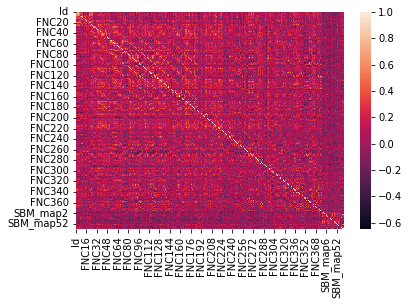

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(train.corr())
plt.show()

In [16]:
labels = pd.read_csv('train_labels.csv')
labels

,Id,Class
0,120873,1
1,135376,0
2,139149,0
3,146791,0
4,153870,1
...,...,...
81,934330,0
82,950671,0
83,963924,1
84,993348,0


In [17]:
Y = labels.iloc[:,1]
Y

0     1
1     0
2     0
3     0
4     1
     ..
81    0
82    0
83    1
84    0
85    1
Name: Class, Length: 86, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(train,Y)

Pipeline : 
Estimator with highest score:  RandomForestClassifier(max_depth=9, max_features='sqrt', n_estimators=10)
Parameter  setting that gave best result on hold out data:  {'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 10}
Score of beest_estimator on left out data:  0.7192307692307691
[[0.4 0.6]
 [0.7 0.3]
 [0.8 0.2]
 [0.4 0.6]
 [0.7 0.3]
 [0.6 0.4]
 [0.4 0.6]
 [0.6 0.4]
 [0.5 0.5]
 [0.6 0.4]
 [0.8 0.2]
 [0.8 0.2]
 [0.4 0.6]
 [0.6 0.4]
 [0.6 0.4]
 [0.4 0.6]
 [0.3 0.7]
 [0.4 0.6]
 [0.4 0.6]
 [0.4 0.6]
 [0.7 0.3]
 [0.4 0.6]]
Accuracy Score:  0.6818181818181818


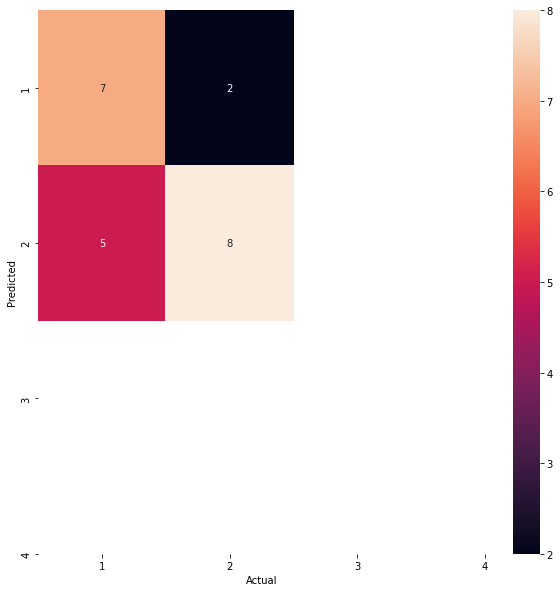

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

rfc = RandomForestClassifier()
n_features = len(train.columns)

param_rfc ={
    'n_estimators':[10,20,30,40],
    'max_features': ['sqrt','log2',n_features],
    'max_depth': [3,6,9,12,15]
}

gs = GridSearchCV(rfc,param_rfc,scoring='accuracy',cv=5,n_jobs=-1)
print("Pipeline : ")
gs_fit =gs.fit(train_X, train_y)
print("Estimator with highest score: ",gs_fit.best_estimator_)
print("Parameter  setting that gave best result on hold out data: ",gs_fit.best_params_)
print("Score of beest_estimator on left out data: ", gs_fit.best_score_)
preds = gs_fit.predict(test_X)
pred_proba = gs_fit.predict_proba(test_X)
print(pred_proba)
print("Accuracy Score: ",accuracy_score(test_y,preds))

conf_mat = confusion_matrix(test_y,preds)
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=[1,2,3,4],yticklabels=[1,2,3,4])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

